# K Nearest Neighbour algorithm
## Submitted by : Abel Rasheed

* In this notebook, i've implemented a KNN algorithm to classify the given fruits dataset
* The algorithm is written from scratch, even though sklearn library is imported to use a few helper functions


### Importing required libraries...
* KNN is the class I wrote which instantiates a KNN object which will be our training model, which is imported from kmeans.py


In [105]:
import math
import csv
import numpy as np
import random
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from knn import KNN,decipher

### loading the data

In [106]:
with open('fruits.csv' , 'r') as csv_file:
    X = []
    y = []
    complete_data = []
    csv_reader = csv.reader(csv_file) 
    for line in csv_reader:
        complete_data.append(line)
        temp_line = line[2:]
        X.append(temp_line)
        y.append(line[0])

In [107]:
X.remove(X[0])
y.remove(y[0])

In [108]:
X = np.array(X).astype(float)
y = np.array(y).astype(float)

### Scaling the data so as to have optimum accuracy

In [109]:
scaler = MinMaxScaler().fit(X)

In [110]:
scaled_data  = scaler.transform(X)
X = scaled_data

### Test, Train splitting the data

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [112]:
y_indices = [0] * 5
for i in range(4):
    arr = []
    for j in range(len(y_train)):
        if (y_train[j] == i+1):
            arr.append(j)
    y_indices[i+1] = arr

### Storing values of each fruits into different arrays with each fruit's name as the name of the array

In [113]:
apple = X_train[y_indices[1]]
mandarain = X_train[y_indices[2]]
orange = X_train[y_indices[3]]
lemon = X_train[y_indices[4]]

In [114]:
plt.style.use('seaborn')

# Visualizing the data, using different features, plotted against each other

* There are a total of 4 features in this dataset, so the model is 4 - dimensional
* Obviously we cannot visualize a 4 dimensional graph, so what I've done is I've plotted every other feature with  each other with the help of six 2- dimensional graphs
* The different fruits are marked with different colors.

## Mass vs Width

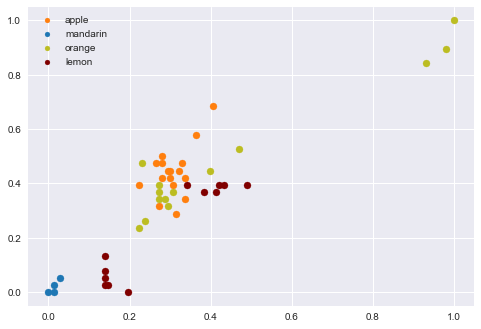

In [115]:
plt.scatter(apple[:,0],apple[:,1] , c='#ff7f0e',label = "apple")

plt.scatter(mandarain[:,0],mandarain[:,1] , c='#1f77b4',label = "mandarin")

plt.scatter(orange[:,0],orange[:,1] , c='#bcbd22',label="orange")

plt.scatter(lemon[:,0],lemon[:,1] , c='#800000',label = "lemon")

plt.legend(loc=2,markerscale=0.7,fontsize="medium")

## Mass vs Height

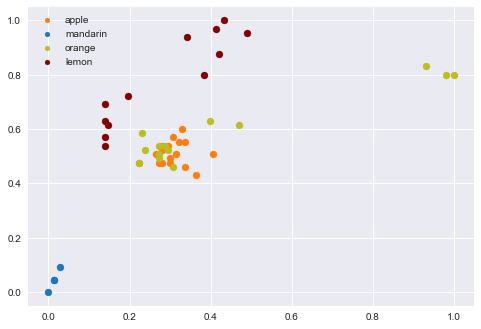

In [116]:
plt.scatter(apple[:,0],apple[:,2] , c='#ff7f0e',label = "apple")

plt.scatter(mandarain[:,0],mandarain[:,2] , c='#1f77b4',label = "mandarin")

plt.scatter(orange[:,0],orange[:,2] , c='#bcbd22',label="orange")

plt.scatter(lemon[:,0],lemon[:,2] , c='#800000',label = "lemon")

plt.legend(loc=2,markerscale=0.7,fontsize="medium")

## Mass vs Color Score

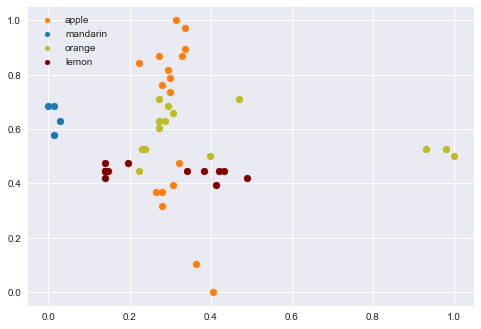

In [117]:
plt.scatter(apple[:,0],apple[:,3] , c='#ff7f0e',label = "apple")

plt.scatter(mandarain[:,0],mandarain[:,3] , c='#1f77b4',label = "mandarin")

plt.scatter(orange[:,0],orange[:,3] , c='#bcbd22',label="orange")

plt.scatter(lemon[:,0],lemon[:,3] , c='#800000',label = "lemon")

plt.legend(loc=2,markerscale=0.7,fontsize="medium")

## Width vs Height

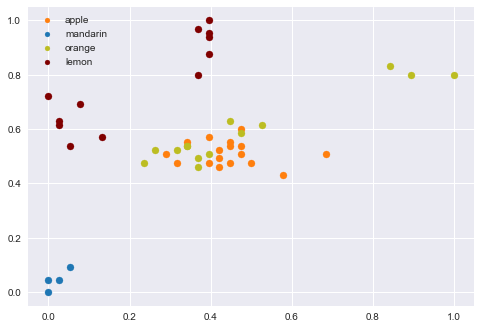

In [118]:
plt.scatter(apple[:,1],apple[:,2] , c='#ff7f0e',label = "apple")

plt.scatter(mandarain[:,1],mandarain[:,2] , c='#1f77b4',label = "mandarin")

plt.scatter(orange[:,1],orange[:,2] , c='#bcbd22',label="orange")

plt.scatter(lemon[:,1],lemon[:,2] , c='#800000',label = "lemon")

plt.legend(loc=2,markerscale=0.7,fontsize="medium")

## Width vs Color Score

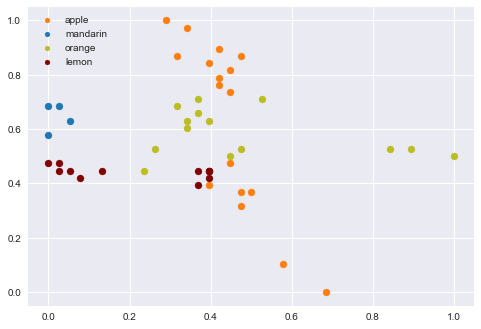

In [119]:
plt.scatter(apple[:,1],apple[:,3] , c='#ff7f0e',label = "apple")

plt.scatter(mandarain[:,1],mandarain[:,3] , c='#1f77b4',label = "mandarin")

plt.scatter(orange[:,1],orange[:,3] , c='#bcbd22',label="orange")

plt.scatter(lemon[:,1],lemon[:,3] , c='#800000',label = "lemon")

plt.legend(loc=2,markerscale=0.7,fontsize="medium")

## Height vs Color Score

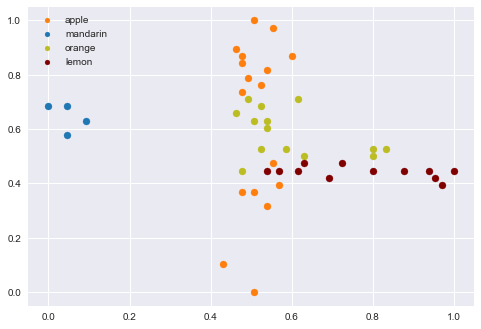

In [120]:
plt.scatter(apple[:,2],apple[:,3] , c='#ff7f0e',label = "apple")

plt.scatter(mandarain[:,2],mandarain[:,3] , c='#1f77b4',label = "mandarin")

plt.scatter(orange[:,2],orange[:,3] , c='#bcbd22',label="orange")

plt.scatter(lemon[:,2],lemon[:,3] , c='#800000',label = "lemon")

plt.legend(loc=2,markerscale=0.7,fontsize="medium")

# Instantiating the KNN object

In [121]:
clf = KNN(k=3)

## Training the KNN object with the features, height and color score

In [122]:
X_train1 = X_train[:,[2,3]]
X_test1 = X_test[:,[2,3]]

In [123]:
clf.fit(X_train1,y_train)

## Predicting wrt test dataset

In [124]:
predicted = clf.predict(X_test1)

In [126]:
accuracy = np.sum(y_test == predicted) / len(y_test)
accuracy

1.0

## The above number is the accuracy of the algorithm with k = 3, multiplying it with 100 gives the accuracy in %

## Lets take some random entries from the data, to see the classifier in action.


### For this, i will be using the help of the fruit arrays, ie apple,mandarin, etc, since the array contains the data of one particular fruit only, and then ill plug that data into the classifier and see the prediction in action. I  will be using a decipher function from knn module, that will return the name of the fruit, from the id

### TestCase 1:

In [127]:
testcase = [orange[3][2:4]]
testcase = np.array(testcase)

In [128]:
decipher(clf.predict(testcase))

['Orange']

### TestCase 2:

In [129]:
testcase  = [mandarain[2][2:4]]
testcase = np.array(testcase)

In [130]:
decipher(clf.predict(testcase))

['Mandarin']

### TestCase 3:

In [131]:
testcase  = [lemon[3][2:4]]
testcase = np.array(testcase)

In [132]:
decipher(clf.predict(testcase))

['Lemon']